In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from pandas.core.internals.construction import dataclasses_to_dicts
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,  RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
import statsmodels
from scipy.stats import norm

In [3]:
df=pd.read_csv("Speed_Dating_Data.csv",encoding='ISO-8859-1')

In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    iid       8378 non-null   int64  
 1    id        8377 non-null   float64
 2    gender    8378 non-null   int64  
 3    idg       8378 non-null   int64  
 4    condtn    8378 non-null   int64  
 5    wave      8378 non-null   int64  
 6    round     8378 non-null   int64  
 7    position  8378 non-null   int64  
 8    positin1  6532 non-null   float64
 9    order     8378 non-null   int64  
 10   partner   8378 non-null   int64  
 11   pid       8368 non-null   float64
 12   match     8378 non-null   int64  
 13   int_corr  8220 non-null   float64
 14   samerace  8378 non-null   int64  
 15   age_o     8274 non-null   float64
 16   race_o    8305 non-null   float64
 17   pf_o_att  8289 non-null   float64
 18   pf_o_sin  8289 non-null   float64
 19   pf_o_int  8289 non-null   float64
 20   pf_o_f

<ipython-input-4-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [5]:
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

#Wiek osoby wybierającej, a wiek osoby wybranej

In [6]:
corr=df.corr()

<ipython-input-6-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

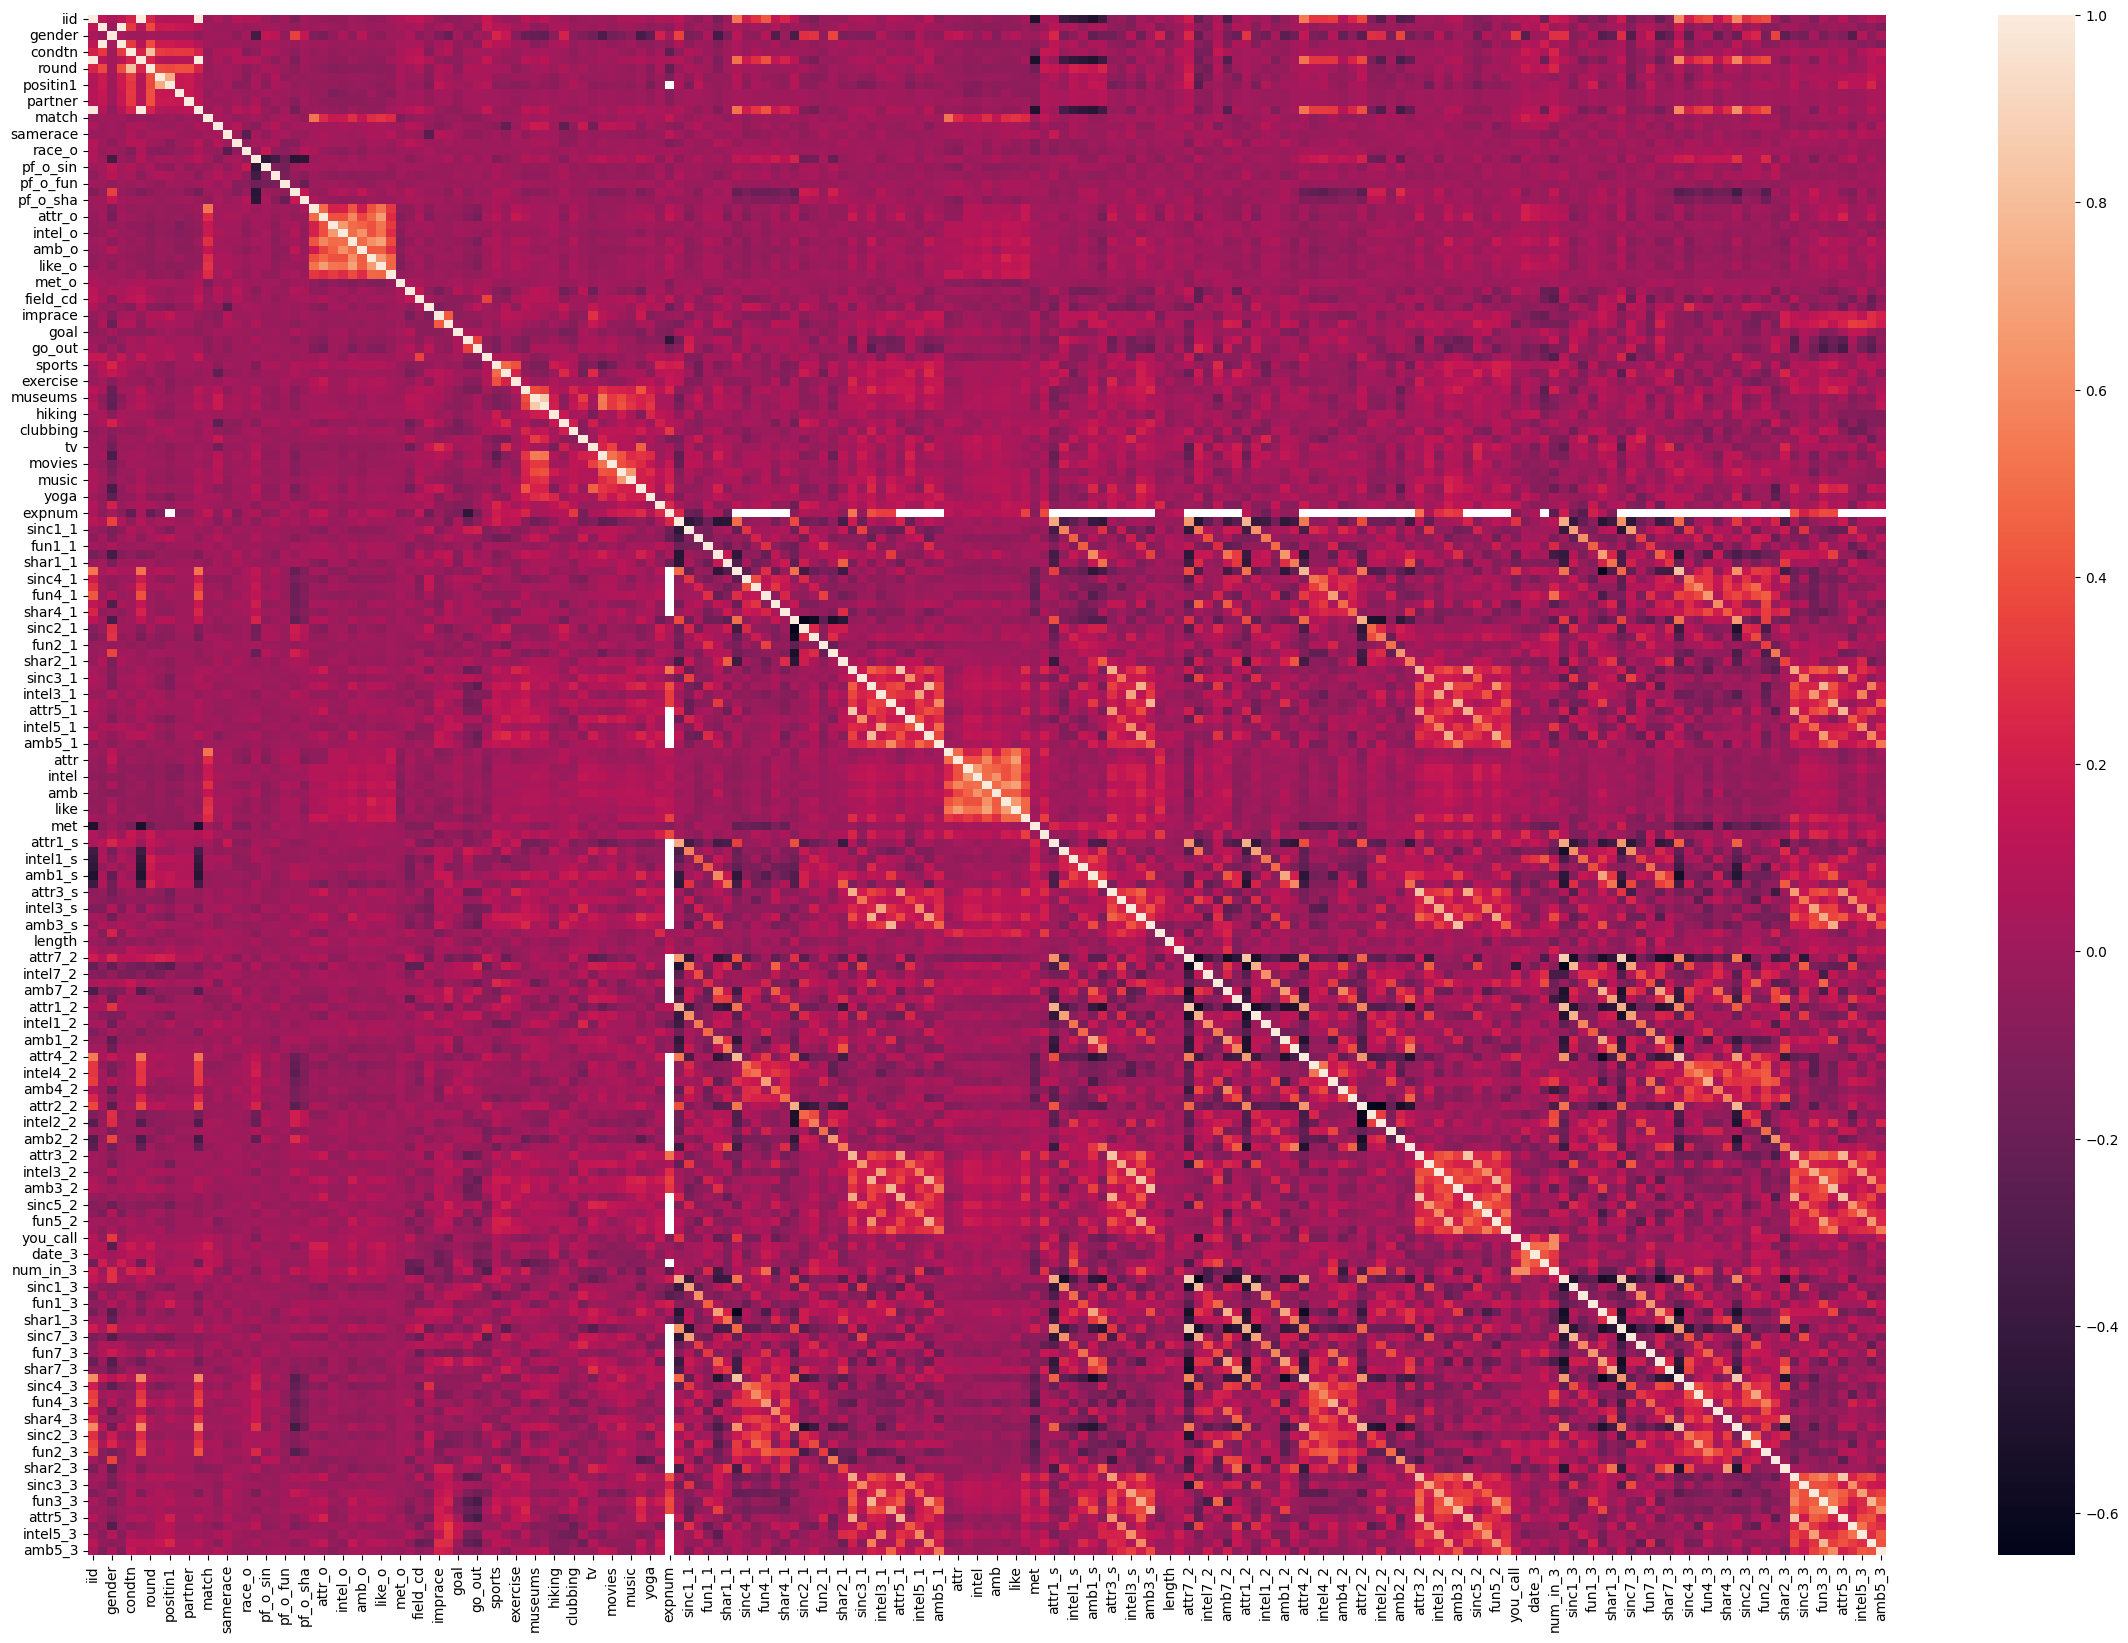

In [7]:
plt.figure(figsize=(29,20))
sns.heatmap(corr)

Text(0, 0.5, 'Wiek osoby wybranej')

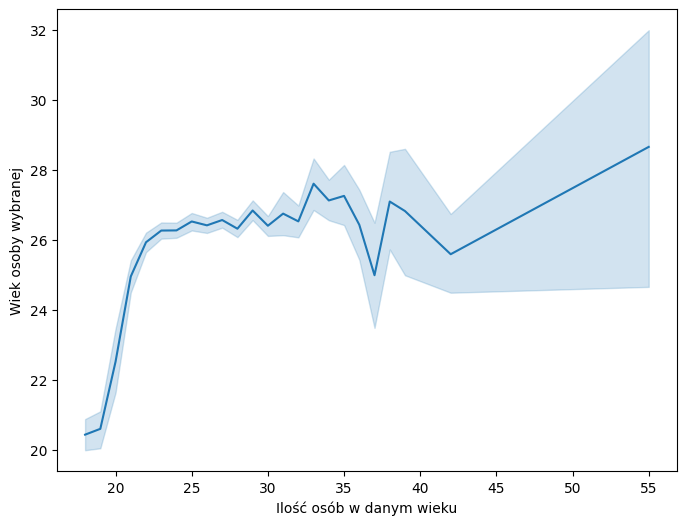

In [8]:
fig,ax=plt.subplots(figsize=(8,6))
sns.lineplot(x='age_o',y='age', data=df)
ax.set_xlabel('Ilość osób w danym wieku')
ax.set_ylabel('Wiek osoby wybranej')

##Stworzenie drugiego zbioru z większymi danymi.##

Zbiór df2 jest zbiorem sprawdzającym jak wszsytkie dane na siebei oddziaływują. Wszsytkie kolumny z danymi literowymi zostaną w nim zamienionene na dane 0-1. Następnie na samym końcu dane z df i df2 zostaną do siebie porównane by sprawdzić czy potrzebne jest inne podzielenie danych. 

In [9]:
df2=df

In [10]:
print (df2)

      iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
...   ...   ...     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22.0       1   44       2    21     22        14      10.0      5   
8374  552  22.0       1   44       2    21     22        13      10.0      4   
8375  552  22.0       1   44       2    21     22        19      10.0     10   
8376  552  22.0       1   44       2    21     22         3      10.0     16   
8377  552   NaN       1   44       2    21     22         2      10.0     15   

      ...  attr3_3  sinc3_3  intel3_3  

#Sprawdzenie danych career oraz rozbicie ich w zbiorze df2#

Dane opisują jakie zawody wykonują uczestniczy Speed Deating. 

In [11]:
career=pd.get_dummies(df['career'])

In [12]:
df2

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [13]:
df2=pd.concat([df2,career], axis=1)

In [14]:
df2

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,teaching/education,tech professional,to get Ph.D and be a professor,undecided,unknown,unsure,writer,writer/editor,writer/producer,writer/teacher
0,1,1.0,0,1,1,1,10,7,NaN,4,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,0,0,0,0,0,0,0,0,0,0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,0,0,0,0,0,0,0,0,0,0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,0,0,0,0,0,0,0,0,0,0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df2=df2.drop('career', axis=1,inplace=False)

##Sprawdzenie danych undergra oraz rozbicie ich w zbiorze df2##

Dane te opisują jakie studia zostały skończone przez osoby biorące udział w badaniu lub gdzie znajdował się uniwersytet. 

In [16]:
df.undergra.unique() #Dane literowe

array([nan, 'George Mason University', 'Holy Cross',
       'University of Pennsylvania', 'UCLA', 'Swarthmore College',
       'Columbia College', 'SUNY Binghamton', 'Barnard College',
       'school of social sciences in uruguay', 'Yale University',
       'University of Washington', 'Columbia', 'SUNY Stony Brook',
       'Fudan University, Shanghai, China', 'Cornell',
       'Universidad Catolica de Chile', 'Amherst College',
       'Hebrew University', 'Universidad Iberoamericana',
       "Tokyo Woman's Christian University, Japan",
       'University of Maryland, and Oxford', 'UW Madison', 'Harvard',
       'Syracuse University', 'Rice', 'Smith College', 'Brown University',
       'University of Warsaw', 'Yale', 'Columbia University', 'Stanford',
       'colby college, waterville, me',
       'ChungShenMedicalUniversity(Taiwan)', 'Wesleyan University',
       'University of Toronto', 'Brandeis University', 'PACE University',
       'charles university, prague, czech republic', 'UC 

In [17]:
undergra=pd.get_dummies(df['undergra'])

In [18]:
df2=pd.concat([df2,undergra], axis=1)

In [19]:
df2=df2.drop(['undergra'], axis=1,inplace=False)

##Zmiana danych w kolumnie mn_sat na dane liczbowe#

Według odnlezionych danych dane mn_sat to inaczej median sat czyli średnia ilość spotkań Speed Dating w trakcie wykonywanego badania. 

In [20]:
df.mn_sat.unique()  #Dane liczbowe

array([nan, '1,070.00', '1,258.00', '1,400.00', '1,290.00', '1,460.00',
       '1,430.00', '1,215.00', '1,330.00', '1,450.00', '1,155.00',
       '1,140.00', '1,360.00', '1,402.00', '1,250.00', '1,210.00',
       '1,220.00', '1,410.00', '1,260.00', '1,380.00', '1,030.00',
       '1,309.00', '1,308.00', '1,050.00', '1,100.00', '1,310.00',
       '1,490.00', '1,188.00', '1,097.00', '1,212.00', '1,340.00',
       '1,034.00', '1,185.00', '1,242.00', '1,160.00', '1,099.00',
       '1,214.00', '1,270.00', '1,110.00', '1,178.00', '1,060.00',
       '1,157.00', '1,180.00', '1,014.00', '1,341.00', '990.00',
       '1,320.00', '1,159.00', '1,370.00', '1,105.00', '1,365.00',
       '1,011.00', '1,130.00', '1,206.00', '1,331.00', '1,191.00',
       '914.00', '1,200.00', '1,080.00', '1,090.00', '1,092.00',
       '1,470.00', '1,149.00', '1,134.00', '1,230.00', '1,267.00',
       '1,280.00', '1,227.00', '1,239.00'], dtype=object)

In [21]:
df['mn_sat'].info

<bound method Series.info of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8373    NaN
8374    NaN
8375    NaN
8376    NaN
8377    NaN
Name: mn_sat, Length: 8378, dtype: object>

In [22]:
df['mn_sat']=df['mn_sat'].astype(str)

In [23]:
df['mn_sat'] = [x.replace(',','') for x in df['mn_sat']]

In [24]:
df['mn_sat']=df['mn_sat'].astype(float)

In [25]:
df.mn_sat.unique() 

array([  nan, 1070., 1258., 1400., 1290., 1460., 1430., 1215., 1330.,
       1450., 1155., 1140., 1360., 1402., 1250., 1210., 1220., 1410.,
       1260., 1380., 1030., 1309., 1308., 1050., 1100., 1310., 1490.,
       1188., 1097., 1212., 1340., 1034., 1185., 1242., 1160., 1099.,
       1214., 1270., 1110., 1178., 1060., 1157., 1180., 1014., 1341.,
        990., 1320., 1159., 1370., 1105., 1365., 1011., 1130., 1206.,
       1331., 1191.,  914., 1200., 1080., 1090., 1092., 1470., 1149.,
       1134., 1230., 1267., 1280., 1227., 1239.])

In [26]:
df2['mn_sat']=df['mn_sat']

##Zmiana nazwy kolumny FROM na HOME oraz zamiana danych#

Dane przedstawiają informację skąd pochodzi osoba biorąca udział w badaniu.

In [27]:
df=df.rename(columns={'from':'home'}) #Dane literowe

In [28]:
df2=df2.rename(columns={'from':'home'})

In [29]:
df.home.unique()

array(['Chicago', 'Alabama', 'Connecticut', 'Texas', 'Bowdoin College',
       'MD', 'Southern California', 'London, England',
       'Palm Springs, California', '94115', 'Argentina', 'England',
       'Cincinnati, Ohio', 'Miami', 'Milan - Italy', 'Georgia, USA',
       'New York', 'california', 'Washington DC', 'New Jersey',
       'Ann Arbor, MI', 'Hong Kong', 'new york', 'Iowa', 'California',
       'Westchester, NY', nan, 'Washington, DC', 'Boston', 'new jersey',
       'Michigan', 'SIngapore', 'Brazil', 'Brandeis University',
       'Cincinnati, OH', 'Los Angeles', 'SF Bay Area, CA', 'China',
       'San Francisco(home)/Los Angeles(undergrad)', 'Spain', 'Israel',
       'Switzerland', 'Italy', 'Philadelphia', 'Houston', 'Brooklyn',
       'Florida', 'Tuscaloosa, Alabama', 'Albuquerque, NM',
       'Palo Alto, California', 'Boston, MA', 'Mexico', 'Torrance, CA',
       'St. Louis, MO', 'London, UK', 'Minnesota', 'Ohio',
       'India/Venezuela', 'Washington State', 'Panama', 'spain

In [30]:
homes=pd.get_dummies(df2['home'])

In [31]:
df2=pd.concat([df2,homes], axis=1)

In [32]:
df2.drop('home', axis=1,inplace=False)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,"ottawa, canada",philippines,poland,"sofia, bg",south carolina,spain,taiwan,uruguay,way too little space here. world citizen.,working
0,1,1.0,0,1,1,1,10,7,NaN,4,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,0,0,0,0,0,0,0,0,0,0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,0,0,0,0,0,0,0,0,0,0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,0,0,0,0,0,0,0,0,0,0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,0,0,0,0,0,0,0,0,0,0


##Sprawdzenie danych w kolumnie field##

Dane przedtawiają jakie kierunki studiów były wybierane przez uczestników Speed Dating.

In [33]:
df.field.unique()

array(['Law', 'law', 'Economics', 'Masters in Public Administration',
       'Masters of Social Work&Education', 'Finance', 'Business',
       'political science', 'money', 'Operations Research',
       'TC (Health Ed)', 'Psychology', 'social work', 'Social Work',
       'Speech Language Pathology', 'Speech Languahe Pathology',
       'Educational Psychology', 'Applied Maths/Econs', 'Mathematics',
       'Statistics', 'Organizational Psychology',
       'Mechanical Engineering', 'Finanace', 'Finance&Economics',
       'Undergrad - GS', 'Mathematical Finance', 'Medicine', 'MBA', 'LAW',
       nan, 'psychology', 'German Literature',
       'Business & International Affairs', 'MFA Creative Writing',
       'Engineering', 'Electrical Engineering', 'Classics',
       'Operations Research (SEAS)', 'chemistry', 'Journalism',
       'Elementary/Childhood Education (MA)', 'microbiology',
       'Masters of Social Work', 'Communications', 'Marketing',
       'Chemistry', 'International Education

In [34]:
field=pd.get_dummies(df2['field'])

In [35]:
df2=pd.concat([df2,field], axis=1)

In [36]:
df2.drop('field', axis=1,inplace=False) #Dane literowe

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,physics (astrophysics),political science,psychology,psychology and english,social work,sociology,speech pathology,teaching of English,theory,working
0,1,1.0,0,1,1,1,10,7,NaN,4,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,0,0,0,0,0,0,0,0,0,0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,0,0,0,0,0,0,0,0,0,0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,0,0,0,0,0,0,0,0,0,0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,0,0,0,0,0,0,0,0,0,0


##Zmiana danych tuition na dane liczbowe##

Dane przedstawiają kwotę czesnego

In [37]:
df.tuition.unique() #Dane liczbowe

array([nan, '12,696.00', '25,020.00', '26,630.00', '15,309.00',
       '26,376.00', '26,908.00', '9,451.00', '24,036.00', '26,100.00',
       '13,258.00', '9,168.00', '26,062.00', '27,240.00', '13,413.00',
       '12,900.00', '26,019.00', '21,960.00', '17,125.00', '24,742.00',
       '27,395.00', '25,917.00', '34,290.00', '27,100.00', '27,076.00',
       '17,030.00', '15,162.00', '25,555.00', '14,433.00', '9,696.00',
       '13,211.00', '11,360.00', '33,585.00', '25,552.00', '23,187.00',
       '21,645.00', '27,728.00', '11,311.00', '10,352.00', '26,377.00',
       '9,210.00', '25,380.00', '14,589.00', '14,695.00', '17,808.00',
       '9,620.00', '27,230.00', '14,388.00', '10,704.00', '25,335.00',
       '22,170.00', '10,356.00', '14,942.00', '3,730.00', '26,786.00',
       '25,425.00', '10,450.00', '10,052.00', '11,424.00', '10,222.00',
       '15,260.00', '18,720.00', '11,132.00', '17,715.00', '23,500.00',
       '14,380.00', '24,921.00', '25,504.00', '26,871.00', '10,800.00',
      

In [38]:
df['tuition']=df['tuition'].replace({None:'0'})

In [39]:
df['tuition'] = [x.replace(',', '') for x in df['tuition']]

In [40]:
df['tuition']=df['tuition'].astype(float)

In [41]:
df2['tuition']=df['tuition']

##Zmiana danych income na dane liczbowe##

Dane przedstawiają dochód uczestników Speed Dating. Jest to dochód roczny. 

In [42]:
df.income.unique() #Dane liczbowe

array(['69,487.00', '65,929.00', nan, '37,754.00', '86,340.00',
       '60,304.00', '54,620.00', '48,652.00', '29,237.00', '56,580.00',
       '36,782.00', '38,548.00', '52,010.00', '28,418.00', '43,185.00',
       '23,152.00', '43,664.00', '48,441.00', '61,152.00', '36,485.00',
       '41,507.00', '17,134.00', '30,038.00', '33,772.00', '24,997.00',
       '42,096.00', '28,891.00', '62,635.00', '12,063.00', '29,809.00',
       '26,482.00', '30,147.00', '39,919.00', '41,466.00', '23,988.00',
       '28,989.00', '50,948.00', '38,022.00', '47,559.00', '53,539.00',
       '32,159.00', '53,940.00', '40,753.00', '38,207.00', '46,166.00',
       '30,973.00', '28,317.00', '26,645.00', '25,589.00', '55,223.00',
       '109,031.00', '40,409.00', '21,597.00', '76,624.00', '35,968.00',
       '51,725.00', '55,419.00', '55,550.00', '26,682.00', '41,547.00',
       '23,361.00', '74,893.00', '52,804.00', '53,923.00', '27,094.00',
       '57,213.00', '42,390.00', '43,636.00', '57,887.00', '30,768.00',

In [43]:
df['income']=df['income'].replace({None:'0'})

In [44]:
df['income'] = [x.replace(',', '') for x in df['income']]

In [45]:
df['income']=df['income'].astype(float)

In [46]:
df2['income']=df['income']

In [47]:
df2['income'].dtype

dtype('float64')

##Zmiana danych zipcode##

Dane przedstawiają dane kodu pocztowego. Został on zmieniony na kod bardziej dla nas czytelny. Dane rówież zostały usunięte z df2

In [48]:
df.zipcode.unique()

array(['60,521', '35,223', '6,268', '77,096', '94,022', '20,878',
       '91,360', '0', '19,335', '14,850', '92,821', '45,243', '33,183',
       '26,900', '30,677', '10,028', '2,467', '3,031', '7,661', '48,104',
       '11,561', '52,803', '94,596', '10,523', nan, '22,151', '1,867',
       '13,413', '8,820', '48,124', '807,931', '29,055', '8,691',
       '45,213', '10,025', '90,026', '94,043', '10,027', '94,133',
       '6,700', '22,442', '10,012', '21,020', '100', '62,996', '19,422',
       '77,026', '19,151', '11,204', '8,071', '13,827', '91,730',
       '33,496', '7,045', '7,747', '35,404', '87,004', '94,306', '11,375',
       '4,605', '11,000', '90,503', '63,034', '53,705', '55,345', '2,021',
       '6,883', '30,100', '33,511', '44,118', '55,446', '43,229', '8,003',
       '411,101', '76,116', '98,579', '10,019', '28,035', '85,201',
       '55,424', '7,746', '10,514', '62,150', '300,151', '48,895',
       '94,108', '11,753', '11,215', '45,242', '10,022', '92,425',
       '110,015', 

In [49]:
df['zipcode']=df['zipcode'].replace({None:'0'})

In [50]:
df['zipcode'] = [x.replace(',', '-') for x in df['zipcode']]

In [51]:
df2.drop('zipcode', axis=1,inplace=False)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,physics (astrophysics),political science,psychology,psychology and english,social work,sociology,speech pathology,teaching of English,theory,working
0,1,1.0,0,1,1,1,10,7,NaN,4,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,0,0,0,0,0,0,0,0,0,0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,0,0,0,0,0,0,0,0,0,0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,0,0,0,0,0,0,0,0,0,0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df=df.fillna(0)

In [53]:
df2=df2.fillna(0)

##Sprawdzenie jak dane teraz wyglądają

In [54]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,0.0,4,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0,1,1,1,10,7,0.0,3,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,0,1,1,1,10,7,0.0,10,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,0,1,1,1,10,7,0.0,5,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
4,1,1.0,0,1,1,1,10,7,0.0,7,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0


##Sprawdzenie danych i stworzenie df3

Sprawdzenie wyglądu df

In [55]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    iid       8378 non-null   int64  
 1    id        8378 non-null   float64
 2    gender    8378 non-null   int64  
 3    idg       8378 non-null   int64  
 4    condtn    8378 non-null   int64  
 5    wave      8378 non-null   int64  
 6    round     8378 non-null   int64  
 7    position  8378 non-null   int64  
 8    positin1  8378 non-null   float64
 9    order     8378 non-null   int64  
 10   partner   8378 non-null   int64  
 11   pid       8378 non-null   float64
 12   match     8378 non-null   int64  
 13   int_corr  8378 non-null   float64
 14   samerace  8378 non-null   int64  
 15   age_o     8378 non-null   float64
 16   race_o    8378 non-null   float64
 17   pf_o_att  8378 non-null   float64
 18   pf_o_sin  8378 non-null   float64
 19   pf_o_int  8378 non-null   float64
 20   pf_o_f

<ipython-input-55-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


Sprawdzenie danych df2

In [56]:
df3=df.drop(['zipcode','home','undergra','field'],axis=1,inplace=True)

In [57]:
df2.info(verbose=True,null_counts=True ) #, mn_sat, zipcode, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 1329 columns):
 #     Column                                                                         Non-Null Count  Dtype  
---    ------                                                                         --------------  -----  
 0     iid                                                                            8378 non-null   int64  
 1     id                                                                             8378 non-null   float64
 2     gender                                                                         8378 non-null   int64  
 3     idg                                                                            8378 non-null   int64  
 4     condtn                                                                         8378 non-null   int64  
 5     wave                                                                           8378 non-null   int64  
 6     roun

<ipython-input-57-6c7f7d67509c>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df2.info(verbose=True,null_counts=True ) #, mn_sat, zipcode,


condtn":"Condition",

"mn_sat":"median_sat",

                     "age_o":"age of partner",

                     "race_o":"race of partner",

                     "pf_o_att":"partner stated preference",

                     "dec_o":"partner's decision",

                     "attr_o":"partner rating of attributes",

                     "imprace":"race importance",

                     "imprelig":"religion importance",

                     "from":"originally from",
                     
                     "date":"frequency of date